# TensorFlow-GPU model for MNIST dataset

In [ ]:
# Version 3
# 
# From begining install Tensorflow-GPU by 
# https://www.thehardwareguy.co.uk/install-tensorflow-gpu
# and look to this comment below article: 
# "In tensorflow = 2.1.0, it is not needed to install keras separately 
# (pip install keras not needed) and it will be installed (keras =2.2.4-tf) 
# as a dependency of tensorflow-gpu with "conda install" itself.

# it's work for me in Win10
# GOOD LUCK :)

In [1]:
# Imports
import os

import tensorflow as tf
# uncomment next 2 lines to start on GPU
# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Data:
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.x_train, self.y_train),(self.x_test, self.y_test) = mnist.load_data(path="mnist.npz")
        # normalization
        self.x_train = self.x_train / 255.0
        self.x_test = self.x_test / 255.0

In [175]:
class Model:
    def __init__(self, hidden_layer, learning_rate):
        self.name = "mnist"
        self.save_folder = os.path.join(os.getcwd(), 
                                        "training_mnist_gpu")
        if not os.path.exists(self.save_folder):
            os.mkdir(self.save_folder)
        self.checkpoint_path = os.path.join(self.save_folder, 
                                            "cp.ckpt")
        
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(hidden_layer, 
                                  activation='relu'),
            tf.keras.layers.Dropout(learning_rate),
            tf.keras.layers.Dense(10, 
                                  activation='softmax')
        ])
        
        self.model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

    def train(self, data, epochs):
        checkpoint_dir = os.path.dirname(self.checkpoint_path)
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=self.checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq=10*len(data.x_train),
                                                         verbose=1)
        self.model.fit(data.x_train, 
                       data.y_train, 
                       epochs=epochs,
                       validation_data=(data.x_train, data.y_train),
                       callbacks=[cp_callback])

        return self.model.evaluate(x=data.x_test, 
                                   y=data.y_test, 
                                   verbose=1)

In [ ]:
hidden_layer=128

# Best values (acc=0.9828)
# ep_list = [15]
# lr_list = [0.15]

# Short exploratory
# ep_list = [3, 5, 7, 10, 12, 15]
# lr_list = [0.15, 0.1, 0.05, 0.01]

# Exploratory values - uncomment to train on various parameters
lr_list = [0.2, 0.15, 0.125, 0.1, 0.075, 0.05, 0.025]
ep_list = range(6, 22, 3)

data = Data()

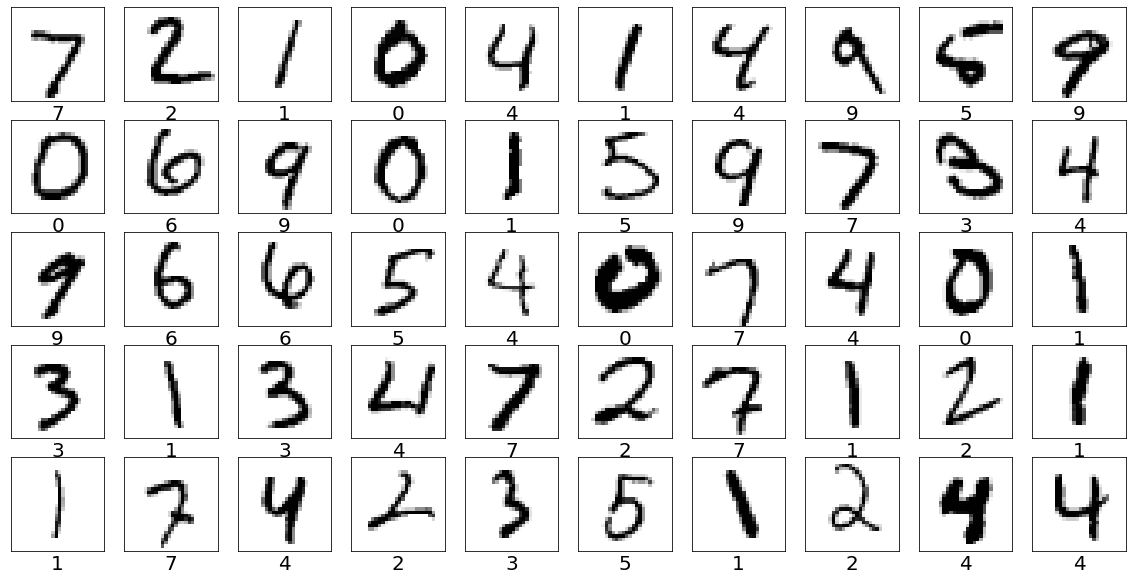

In [193]:
# Visual test for test_data
plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data.x_test[i], cmap=plt.cm.binary)
    plt.xlabel(data.y_test[i], size=20)
    plt.grid(False)
plt.show()

In [176]:
results = list()
best_acc = 0
cycle = 1
all_cycles = len(lr_list) * len(ep_list)
for lr in lr_list:
    for ep in ep_list:
        print(f"\n--- cycle {cycle} of {all_cycles} ---")
        print(f"learning_rate={lr}, num_ep={ep}")
        
        M = Model(hidden_layer, lr)
        loss, acc = M.train(data, ep)
        
        # save best
        if acc > best_acc:
            params = f"hl{hidden_layer}_lr{int(lr*10000)}_ep{ep}"
            model_filename = f"{M.name}_{int(acc*10000)}({params}).h5"
            M.model.save(os.path.join(M.save_folder, model_filename))
            print(f"model saved to {model_filename}")
            best_acc = acc
        
        results.append({'n': cycle, 'lr': lr, 'ep': ep, 'loss': loss, 'acc': acc})
        cycle += 1


--- cycle 1 of 42 ---
learning_rate=0.2, num_ep=6
Train on 60000 samples, validate on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2942 - accuracy: 0.9152 - val_loss: 0.1376 - val_accuracy: 0.9610
Epoch 2/6
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1424 - accuracy: 0.9587 - val_loss: 0.0849 - val_accuracy: 0.9752
Epoch 3/6
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1087 - accuracy: 0.9669 - val_loss: 0.0638 - val_accuracy: 0.9817
Epoch 4/6
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0873 - accuracy: 0.9731 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 5/6
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0749 - accuracy: 0.9767 - val_loss: 0.0409 - val_accuracy: 0.9878
Epoch 6/6
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0671 - accuracy: 0.9787 - val_loss: 0.0356 - val_accuracy: 0.9893
model sa

60000/60000 [==============================] - 6s 92us/sample - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.0265 - val_accuracy: 0.9923
Epoch 8/18
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0506 - accuracy: 0.9835 - val_loss: 0.0214 - val_accuracy: 0.9938
Epoch 9/18
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0465 - accuracy: 0.9844 - val_loss: 0.0201 - val_accuracy: 0.9943
Epoch 10/18
59232/60000 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9849
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0446 - accuracy: 0.9849 - val_loss: 0.0171 - val_accuracy: 0.9950
Epoch 11/18
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0390 - accuracy: 0.9863 - val_loss: 0.0173 - val_accuracy: 0.9951
Epoch 12/18
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0385 - a

60000/60000 [==============================] - 6s 105us/sample - loss: 0.2855 - accuracy: 0.9174 - val_loss: 0.1318 - val_accuracy: 0.9619
Epoch 2/12
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1381 - accuracy: 0.9590 - val_loss: 0.0816 - val_accuracy: 0.9766
Epoch 3/12
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1020 - accuracy: 0.9685 - val_loss: 0.0601 - val_accuracy: 0.9826
Epoch 4/12
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0819 - accuracy: 0.9747 - val_loss: 0.0500 - val_accuracy: 0.9848
Epoch 5/12
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0686 - accuracy: 0.9781 - val_loss: 0.0349 - val_accuracy: 0.9901
Epoch 6/12
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0591 - accuracy: 0.9807 - val_loss: 0.0339 - val_accuracy: 0.9894
Epoch 7/12
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0513 - accuracy: 0.9838 - val_los

60000/60000 [==============================] - 5s 91us/sample - loss: 0.0665 - accuracy: 0.9793 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 6/21
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0583 - accuracy: 0.9805 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 7/21
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0508 - accuracy: 0.9836 - val_loss: 0.0249 - val_accuracy: 0.9930
Epoch 8/21
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.0219 - val_accuracy: 0.9935
Epoch 9/21
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0396 - accuracy: 0.9866 - val_loss: 0.0167 - val_accuracy: 0.9951
Epoch 10/21
59488/60000 [============================>.] - ETA: 0s - loss: 0.0370 - accuracy: 0.9879
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0371 - a

Epoch 6/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0532 - accuracy: 0.9829 - val_loss: 0.0281 - val_accuracy: 0.9916
Epoch 7/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0457 - accuracy: 0.9852 - val_loss: 0.0217 - val_accuracy: 0.9937
Epoch 8/15
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0196 - val_accuracy: 0.9946
Epoch 9/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.0163 - val_accuracy: 0.9956
Epoch 10/15
59168/60000 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9888
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0332 - accuracy: 0.9888 - val_loss: 0.0156 - val_accuracy: 0.9956
Epoch 11/15
60000/60000 [==============================] - 7s 117us/sample - loss


--- cycle 19 of 42 ---
learning_rate=0.1, num_ep=6
Train on 60000 samples, validate on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2783 - accuracy: 0.9191 - val_loss: 0.1242 - val_accuracy: 0.9648
Epoch 2/6
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1268 - accuracy: 0.9624 - val_loss: 0.0795 - val_accuracy: 0.9766
Epoch 3/6
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0908 - accuracy: 0.9721 - val_loss: 0.0602 - val_accuracy: 0.9822
Epoch 4/6
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0728 - accuracy: 0.9775 - val_loss: 0.0457 - val_accuracy: 0.9860
Epoch 5/6
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0334 - val_accuracy: 0.9906
Epoch 6/6
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0504 - accuracy: 0.9837 - val_loss: 0.0320 - val_accuracy: 0.9897

--- cyc

60000/60000 [==============================] - 6s 99us/sample - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0203 - val_accuracy: 0.9939
Epoch 9/18
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0203 - val_accuracy: 0.9940
Epoch 10/18
59712/60000 [============================>.] - ETA: 0s - loss: 0.0328 - accuracy: 0.9892
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0172 - val_accuracy: 0.9950
Epoch 11/18
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 12/18
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0154 - val_accuracy: 0.9950
Epoch 13/18
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0248 

60000/60000 [==============================] - 6s 96us/sample - loss: 0.1234 - accuracy: 0.9632 - val_loss: 0.0817 - val_accuracy: 0.9763
Epoch 3/12
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0553 - val_accuracy: 0.9842
Epoch 4/12
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0430 - val_accuracy: 0.9878
Epoch 5/12
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0332 - val_accuracy: 0.9897
Epoch 6/12
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0482 - accuracy: 0.9845 - val_loss: 0.0274 - val_accuracy: 0.9919
Epoch 7/12
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0245 - val_accuracy: 0.9926
Epoch 8/12
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0342 - accuracy: 0.9887 - val_loss

60000/60000 [==============================] - 6s 97us/sample - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.0283 - val_accuracy: 0.9919
Epoch 7/21
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0237 - val_accuracy: 0.9930
Epoch 8/21
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0355 - accuracy: 0.9882 - val_loss: 0.0171 - val_accuracy: 0.9955
Epoch 9/21
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.0158 - val_accuracy: 0.9955
Epoch 10/21
59360/60000 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9907
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0277 - accuracy: 0.9907 - val_loss: 0.0134 - val_accuracy: 0.9963
Epoch 11/21
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0246 - a

Epoch 7/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0241 - val_accuracy: 0.9926
Epoch 8/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.0163 - val_accuracy: 0.9954
Epoch 9/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0176 - val_accuracy: 0.9945
Epoch 10/15
59936/60000 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9919
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0147 - val_accuracy: 0.9954
Epoch 11/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 12/15
60000/60000 [==============================] - 6s 100us/sample - lo

60000/60000 [==============================] - 6s 102us/sample - loss: 0.2595 - accuracy: 0.9265 - val_loss: 0.1312 - val_accuracy: 0.9626
Epoch 2/6
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1167 - accuracy: 0.9661 - val_loss: 0.0786 - val_accuracy: 0.9776
Epoch 3/6
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.0604 - val_accuracy: 0.9823
Epoch 4/6
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 5/6
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0307 - val_accuracy: 0.9908
Epoch 6/6
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0259 - val_accuracy: 0.9926

--- cycle 38 of 42 ---
learning_rate=0.025, num_ep=9
Train on 60000 samples, validate on 60000 samples
Epoch 1/9
60000/

Epoch 9/18
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0126 - val_accuracy: 0.9965
Epoch 10/18
59648/60000 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9938
Epoch 00010: saving model to C:\Users\dimish\Desktop\nn\training_mnist_gpu\cp.ckpt
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0210 - val_accuracy: 0.9929
Epoch 11/18
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 12/18
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0093 - val_accuracy: 0.9969
Epoch 13/18
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0164 - val_accuracy: 0.9944
Epoch 14/18
60000/60000 [==============================] - 6s 95us/sample - los

In [177]:
# Show me best 5 in table
results_df = pd.DataFrame(columns=['n', 'lr', 'ep', 'loss', 'acc'])
results_df = results_df.append(results, ignore_index=True).sort_values('acc', ascending=False)
print(results_df.head())

     n     lr  ep      loss     acc
9   10  0.150  15  0.071436  0.9828
11  12  0.150  21  0.087528  0.9816
16  17  0.125  18  0.081224  0.9816
28  29  0.075  18  0.075384  0.9813
33  34  0.050  15  0.083562  0.9812


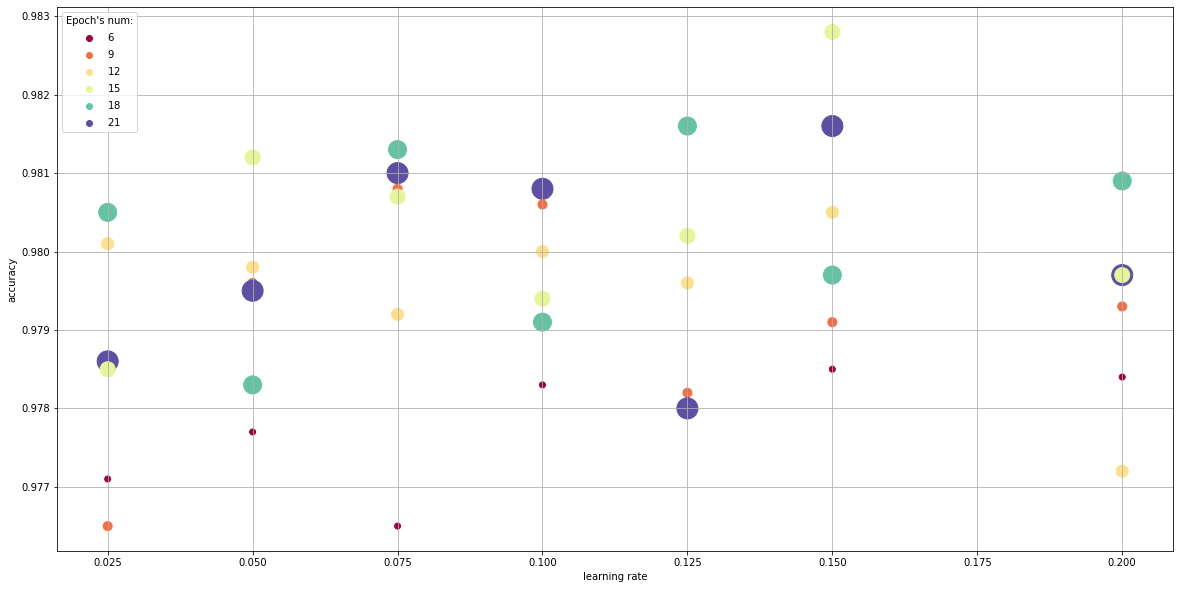

In [206]:
# Show me graph
g = results_df[['ep', 'lr', 'acc']]

fig, ax = plt.subplots(figsize=(20,10))


scatter = ax.scatter(x='lr', y='acc', 
                     data=g, 
                     s=list(map(lambda a: a*a, g['ep'])),
                     c='ep',
                     alpha=1,
                     cmap="Spectral")

plt.ylabel('accuracy')
plt.xlabel('learning rate')

ax.legend(*scatter.legend_elements(), 
          loc="upper left", 
          title="Epoch's num:")
ax.grid(True)
plt.show()